# GETTING THINGS READY FOR PROJECT

## Importing the required libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [10]:
a=pd.read_csv('adult.csv')

## Handling missing values

In [11]:
miss=['?']
a=pd.read_csv('adult.csv',na_values=miss)
a.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
a.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
a.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
c=a.dropna()

In [15]:
c.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# DATA PREPARATION

## Removing unnecessary columns

In [16]:
c=c.drop('fnlwgt',axis=1)

In [17]:
c=c.drop('relationship',axis=1)
c=c.drop('native-country',axis=1)
c=c.drop('marital-status',axis=1)

In [18]:
c=c.drop('workclass',axis=1)
c=c.drop('education',axis=1)
c=c.drop('occupation',axis=1)

In [19]:
c.head()

,age,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,7,Black,Male,0,0,40,<=50K
1,38,9,White,Male,0,0,50,<=50K
2,28,12,White,Male,0,0,40,>50K
3,44,10,Black,Male,7688,0,40,>50K
5,34,6,White,Male,0,0,30,<=50K


In [20]:
c.shape

(45222, 8)

In [21]:
e= c.select_dtypes(include=['int64' ,  'float64'])
e.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
c_e = pd.DataFrame(ss.fit_transform(e), 
                      columns = e.columns)
c_e.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [23]:
g= c.select_dtypes(include=['object'])
g.head()

,race,gender,income
0,Black,Male,<=50K
1,White,Male,<=50K
2,White,Male,>50K
3,Black,Male,>50K
5,White,Male,<=50K


In [24]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
c_g = pd.DataFrame(encoder.fit_transform(g), 
                      columns=encoder.get_feature_names(g.columns))
c_g.head()

,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0


In [25]:
c = pd.concat([c_e, c_g], axis=1)
c.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,0.0,0.0,0.0,1.0,1.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,1.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
y = c.drop('income_>50K')
x = c

KeyError: "['income_>50K'] not found in axis"

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=30)

NameError: name 'x' is not defined

In [101]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31655, 10) (31655,)
(13567, 10) (13567,)


In [102]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[ 0.55602665  0.83373888  2.3966411   0.2656939   0.37174127  0.38619512
  -0.00400284  0.15180787  0.44165087  1.1320393 ]]
[-2.51328824]


In [104]:
y_train_pred = logisticRegr.predict(x_train)

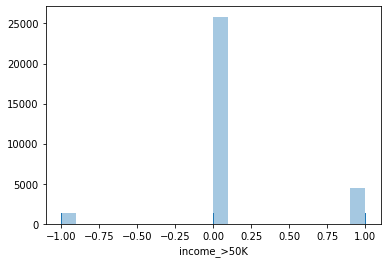

In [105]:
residual = y_train - y_train_pred

sns.distplot(residual, bins=20, kde=False, rug=True)

In [106]:
y_test_pred = logisticRegr.predict(x_test)

In [107]:
t_c = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
t_c.head()

,Actual,Predicted
38210,0.0,0.0
34457,0.0,0.0
274,1.0,1.0
17637,0.0,0.0
30247,0.0,0.0


In [108]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.17771062136065452
Mean Squared Error:  0.17771062136065452
Root Mean Squared Error:  0.42155737611937777


In [111]:
print(metrics.r2_score(y_test, y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.037133035801596215
0.8222893786393455


In [112]:
c_matrix = metrics.confusion_matrix(y_test,y_test_pred)
c_matrix

array([[9713,  541],
       [1870, 1443]], dtype=int64)

In [113]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     10254
         1.0       0.73      0.44      0.54      3313

    accuracy                           0.82     13567
   macro avg       0.78      0.69      0.72     13567
weighted avg       0.81      0.82      0.81     13567



# RFE

In [127]:
from sklearn.linear_model import LinearRegression
regressor_temp=LinearRegression()

In [128]:
from sklearn.feature_selection import RFE
rfe=RFE(regressor_temp,5)
rfe=rfe.fit(x_train,y_train)

In [132]:
temp_c = pd.DataFrame({"Columns" : x_train.columns, "Included" : rfe.support_, "Ranking" : rfe.ranking_})
temp_c

,Columns,Included,Ranking
0,age,True,1
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,2
4,hours-per-week,True,1
5,race_Asian-Pac-Islander,False,4
6,race_Black,False,6
7,race_Other,False,5
8,race_White,False,3
9,gender_Male,True,1


In [133]:
imp_col = x_train.columns[rfe.support_]
imp_col

Index(['age', 'educational-num', 'capital-gain', 'hours-per-week',
       'gender_Male'],
      dtype='object')

In [134]:
x_train_new = c[imp_col]
x_train_new.head()

,age,educational-num,capital-gain,hours-per-week,gender_Male
0,-1.024983,-1.221559,-0.146733,-0.078120,1.0
1,-0.041455,-0.438122,-0.146733,0.754701,1.0
2,-0.798015,0.737034,-0.146733,-0.078120,1.0
3,0.412481,-0.046403,0.877467,-0.078120,1.0
4,-0.344079,-1.613277,-0.146733,-0.910942,1.0


In [135]:
c_train,c_test = train_test_split(c, train_size = 0.7, random_state = 38)
from sklearn.linear_model import LogisticRegression
regressor_new = LogisticRegression()
regressor_new.fit(x_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

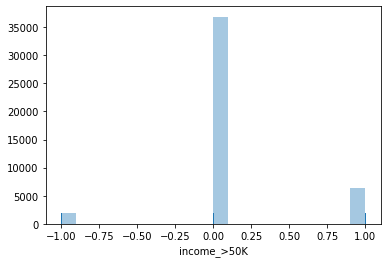

In [136]:
y_train_pred_new = regressor_new.predict(x_train_new)
residual = y - y_train_pred_new
sns.distplot(residual, bins=20, kde=False, rug=True)

In [138]:
x_test_new = c[imp_col]
y_test_pred_new = regressor_new.predict(x_test_new)

In [139]:
temp_c_new = pd.DataFrame({'Actual' : y, 'Predicted' : y_test_pred_new})
temp_c_new

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
45217,0.0,0.0
45218,1.0,0.0
45219,0.0,0.0
45220,0.0,0.0


In [140]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_test_pred_new))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_test_pred_new))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, y_test_pred_new)))

Mean Absolute Error:  0.18557339348104904
Mean Squared Error:  0.18557339348104904
Root Mean Squared Error:  0.4307823040481689


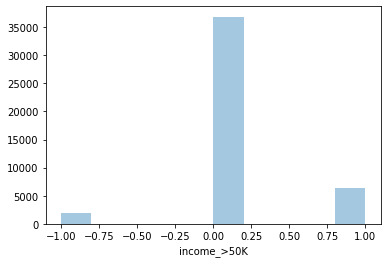

In [142]:
residual_test_new = y - y_test_pred_new
sns.distplot(residual_test_new, bins=10, kde=False)

In [143]:
res_c = pd.DataFrame({'res_test' : residual_test, 'res_test_new': residual_test_new})
res_c.head()

,res_test,res_test_new
0,NaN,0.0
1,NaN,0.0
2,NaN,1.0
3,NaN,0.0
4,NaN,0.0


In [144]:
print(metrics.r2_score(y, y_test_pred_new))
print(metrics.accuracy_score(y,y_test_pred_new))

0.004527169754638183
0.8144266065189509


In [145]:
print(metrics.classification_report(y, y_test_pred_new))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     34014
         1.0       0.71      0.43      0.53     11208

    accuracy                           0.81     45222
   macro avg       0.77      0.68      0.71     45222
weighted avg       0.80      0.81      0.80     45222



# PCA

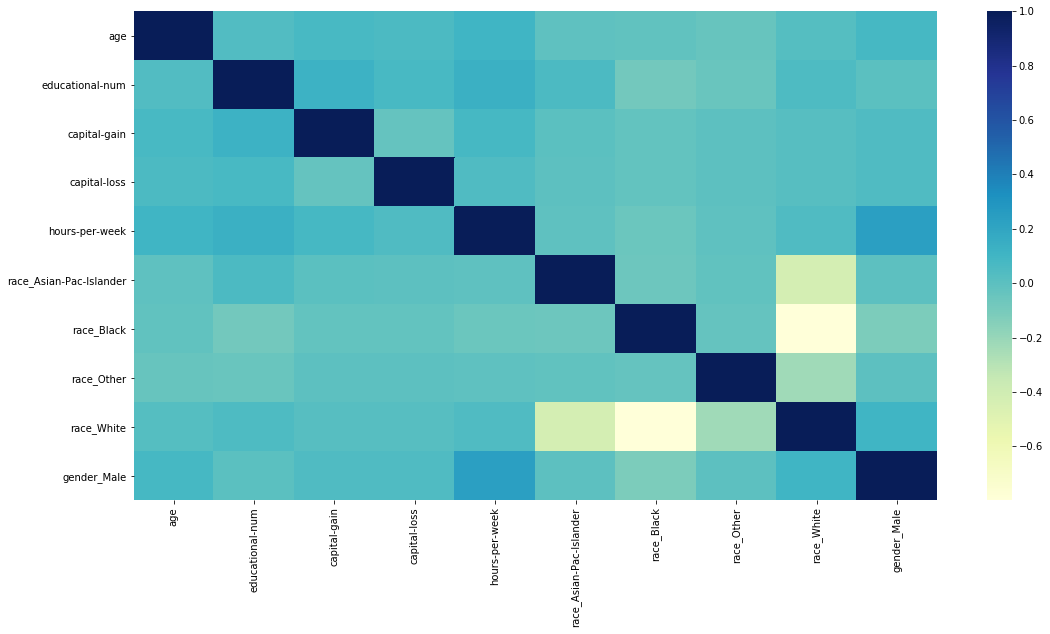

In [151]:
plt.figure(figsize=(18, 9))
sns.heatmap(x_train.corr(), cmap="YlGnBu")

In [152]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [154]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

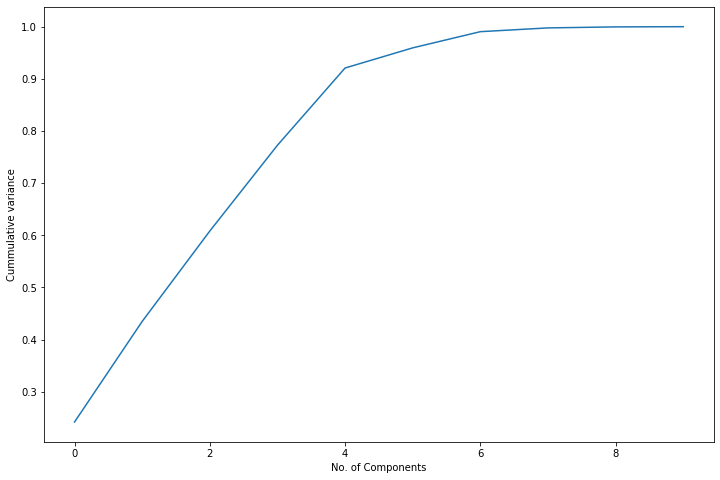

In [155]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [156]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24185931, 0.43470781, 0.60808907, 0.77258885, 0.92074395,
       0.95937097, 0.99043876, 0.99766885, 0.9996119 , 1.        ])

In [162]:
from sklearn.decomposition import PCA
pca_final = PCA(n_components = 10, random_state = 0)
x_train_pca = pca_final.fit_transform(x_train)

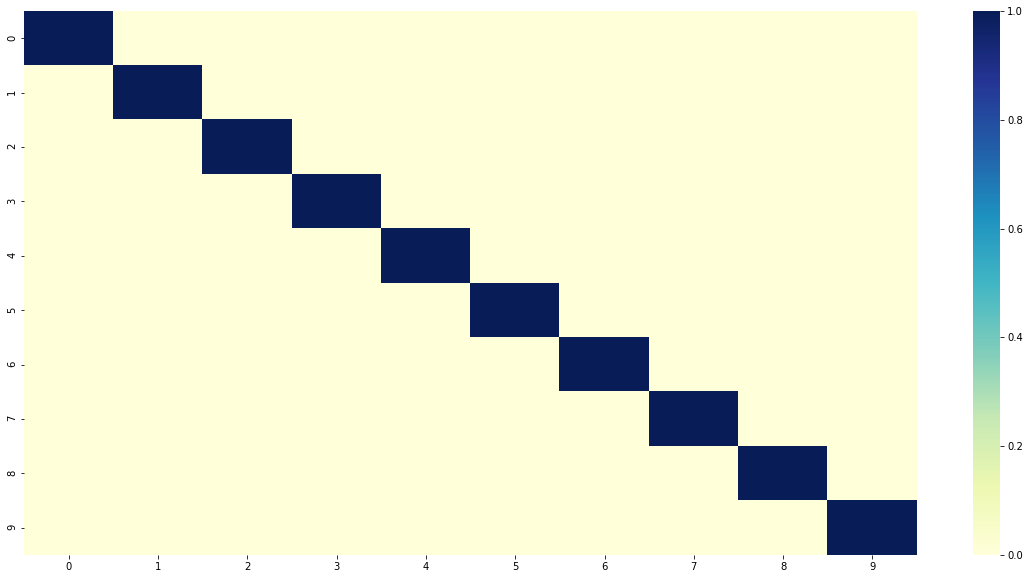

In [163]:
corrmat = np.corrcoef(x_train_pca.T)
plt.figure(figsize=(20, 10))
sns.heatmap(corrmat, cmap="YlGnBu")

In [164]:
x_test_pca = pca_final.transform(x_test)

In [165]:
from sklearn.linear_model import LogisticRegression
regressor_pca = LogisticRegression()
regressor_pca.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [166]:
print(regressor_pca.coef_)
print(regressor_pca.intercept_)

[[ 2.2506565   1.08014695 -0.03087419  0.89570093  0.40282185 -1.00016297
   0.37711258  0.12026341 -0.17006966 -0.47021482]]
[-1.33135885]


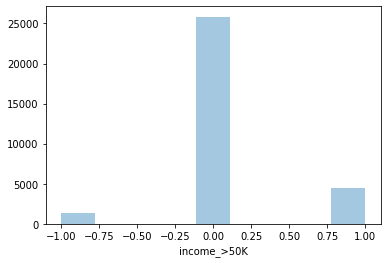

In [167]:
y_train_pred_pca = regressor_pca.predict(x_train_pca)
residual_pca = y_train - y_train_pred_pca
sns.distplot(residual_pca, bins=9, kde=False)

In [168]:
y_test_pred_pca = regressor_pca.predict(x_test_pca)
temp_c = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})
temp_c.head()

,Actual,Predicted
38210,0.0,0.0
34457,0.0,0.0
274,1.0,1.0
17637,0.0,0.0
30247,0.0,0.0


In [169]:
print(metrics.accuracy_score(y_test,y_test_pred_pca))

0.8222893786393455


In [170]:
print(metrics.classification_report(y_test, y_test_pred_pca))
# Number of features = 10

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     10254
         1.0       0.73      0.44      0.54      3313

    accuracy                           0.82     13567
   macro avg       0.78      0.69      0.72     13567
weighted avg       0.81      0.82      0.81     13567



# KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [172]:
y_test_pred_knn = classifier.predict(x_test)

In [173]:
metrics.accuracy_score(y_test, y_test_pred_knn)

0.8104960566079458

In [174]:
print(metrics.classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     10254
         1.0       0.64      0.52      0.57      3313

    accuracy                           0.81     13567
   macro avg       0.75      0.71      0.72     13567
weighted avg       0.80      0.81      0.80     13567



# DT

In [2]:
from sklearn import tree
z = tree.DecisionTreeClassifier(max_depth = 100)
z = z.fit(x_train_pca , y_train)
y_test_pred_dt = z.predict(x_test_pca)

NameError: name 'x_train_pca' is not defined

In [176]:
metrics.accuracy_score(y_test , y_test_pred_dt)

0.802535564236751

In [177]:
print(metrics.classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87     10254
         1.0       0.63      0.47      0.54      3313

    accuracy                           0.80     13567
   macro avg       0.73      0.69      0.71     13567
weighted avg       0.79      0.80      0.79     13567



# SVM

In [3]:
from sklearn.svm import SVC
classifier_svc = SVC()
classifier_svc.fit(x_train_pca , y_train)
y_test_pred_svm = classifier_svc.predict(x_test_pca)

NameError: name 'x_train_pca' is not defined

In [ ]:
metrics.accuracy_score(y_test , y_test_pred_svm)

In [ ]:
print(metrics.classification_report(y_test, y_test_pred_dt))